<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.12%20-%20Vanishing%20gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [22]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [23]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.15.0'

## **Introducción**

TensorBoard es una herramienta de visualización para comprender varias métricas de modelos de redes neuronales y el proceso de entrenamiento. Primero explicaremos qué es TensorBoard y cómo instalarlo. Luego, le mostraremos un ejemplo de cómo usar Tensorboard usando Keras y le mostraremos varias visualizaciones.

## **¿Qué es TensorBoard?**

TensorBoard es una aplicación web de visualización para comprender mejor varios parámetros del modelo de red neuronal y sus métricas de entrenamiento. Estas visualizaciones son muy útiles cuando se realizan experimentos con modelos de redes neuronales y se desea vigilar de cerca las métricas relacionadas. Es de código abierto y forma parte del grupo Tensorflow.

Algunas de las cosas útiles que puedes hacer con TensorBoard incluyen:

* Visualiza métricas como precisión y pérdida.
* Visualiza el gráfico del modelo.
* Visualiza histogramas de pesos y sesgos para comprender cómo cambian durante el entrenamiento.
* Visualiza datos como texto, imágenes y audio.
* Visualiza incrustaciones en un espacio de dimensiones inferiores.

## **Tutorial de TensorBoard (Keras)**

Aquí vamos a utilizar un pequeño proyecto para crear una red neuronal en Keras para el tutorial de Tensorboard. Para ello, utilizaremos el famoso conjunto de datos de reconocimiento de dígitos escritos a mano MNIST.

Dado que este es un tutorial de TensorBoard, no explicaremos mucho sobre el preprocesamiento de datos y el proceso de construcción de redes neuronales. Para comprender más detalles sobre cómo trabajar con el conjunto de datos de dígitos escritos a mano de MNIST, puede consultar el siguiente tutorial

## **i) Instalar TensorBoard**

Puede instalar TensorBoard usando pip como se muestra a continuación

In [24]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


ii) Iniciar TensorBoard
Lo primero que debemos hacer es iniciar el servicio TensorBoard. Para hacer esto, debe ejecutar a continuación en el símbolo del sistema. El parámetro –logdir indica el directorio donde se guardarán los datos para visualizar TensorBoard. Aquí le hemos dado el nombre del directorio como "registros".

Esto iniciará el servicio TensorBoard en el puerto predeterminado 6066 como se muestra a continuación. Se puede acceder al panel de TesnorBoard como http://localhost:6006/

## **iii) Cargando bibliotecas**

Importaremos rápidamente las bibliotecas necesarias para nuestro ejemplo. (Tenga en cuenta que estas bibliotecas no tienen nada que ver con TensorBoard, pero son necesarias para construir la red neuronal de nuestro ejemplo).

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## **iv) Carga del conjunto de datos MNIST**

Ahora cargaremos el conjunto de datos MNIST que viene como parte del paquete Keras. También visualicemos rápidamente datos de una muestra después de cargar el conjunto de datos.

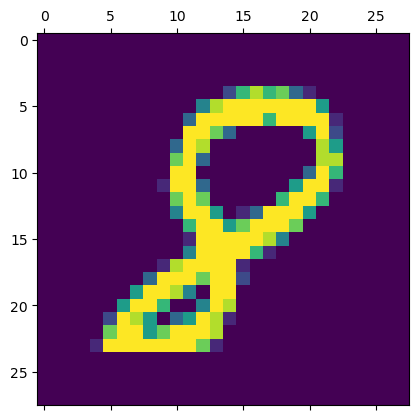

In [26]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
plt.matshow(X_train[np.random.randint(0, X_train.shape[0])]);

## **v) Preprocesamiento**

Ahora preprocesaremos los datos normalizándolos entre 0 y 1 y luego aplanándolos.

In [27]:
X_train = X_train / 255 
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28) 
X_test_flattened = X_test.reshape(len(X_test), 28*28)

## **xi) Crear y compilar el modelo**

Ahora creamos y compilamos un modelo de red neuronal simple que consta de solo una capa de entrada, una capa oculta de 100 neuronas y una capa de salida. Todas las demás configuraciones son estándar.

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **vii) Crear objeto de devolución de llamada**


Aquí es donde debemos llamar nuestra atención mientras trabajamos con TensorBoard. Tenemos que crear un objeto de devolución de llamada de Keras para TensorBoard que ayudará a escribir registros para TensorBoard durante el proceso de capacitación.

Tenga en cuenta que la ruta principal para log_dir a continuación debe ser la misma que el valor de logdir que proporcionamos al iniciar el servicio TensorBoard en el segundo paso.

In [34]:
!rm -rf logs # Borrar la carpeta de logs

In [29]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

## **viii) Modelo de formación**

Finalmente, comenzamos el entrenamiento del modelo usando la función fit(). Lo entrenamos durante 5 épocas y notamos que también pasamos el objeto de devolución de llamada que creamos en el paso anterior.

In [21]:
model.fit(X_train, y_train, epochs=5,callbacks=[tb_callback])


Epoch 1/5


2024-03-22 11:17:08.983471: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9837


## **ix) Modelo de visualización en Tensorboard**

Ahora podemos ir al panel de TensorBoard que iniciamos en el primer paso y ver todas las visualizaciones que tiene para ofrecer. Las visualizaciones dependen principalmente de los datos que haya registrado para TensorBoard. Dependiendo de los datos registrados, los complementos correspondientes de TensorBoard se activan y puede verlos seleccionando el menú desplegable "Inactivo" en la esquina superior derecha del panel.

Veamos las visualizaciones disponibles en nuestro ejemplo.

Escalares
Muestra visualizaciones de precisión y pérdida en cada época durante el proceso de entrenamiento. Y cuando pasa el cursor sobre el gráfico, muestra más información como valor, paso y tiempo.

In [30]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


## **x) Comparación de diferentes modelos en TensorBoard**

Crear una buena red neuronal no es un trabajo sencillo y requiere varias ejecuciones para experimentar con varios parámetros. Con TensorBoard, puede visualizar el rendimiento de todas las ejecuciones del modelo en el panel y compararlos fácilmente.

Para ello crearemos los registros de entrenamiento en diferentes subcarpetas dentro de la carpeta principal. El siguiente ejemplo le ayudará a comprender mejor.

En la primera ejecución, creamos el objeto de devolución de llamada de Keras de TensorBoard cuyos registros se guardarán en la carpeta 'run1' dentro de la carpeta de registros principal.

In [31]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/run1", histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5


2024-03-22 11:18:02.876381: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2749 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1221 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9843


In [32]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/run2", histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
  34/1875 [..............................] - ETA: 5s - loss: 0.0320 - accuracy: 0.9899

2024-03-22 11:18:29.907852: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9899
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9920
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9937
